In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [85]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [86]:
df.shape


(5110, 12)

In [87]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [88]:
import math


def average(data_,feature_):
    sum_=0
    count=0
    #feature_='bmi'
    for c in data_[feature_]:
        if(not math.isnan(c)):
            sum_=sum_+c
            count+=1
    return sum_ /count

def fillna(data,feature):
    for i in range(len(data[feature])):
        if(math.isnan(data[feature][i])) :
            data[feature][i]=average(data,feature)


fillna(df,'bmi')

print(df.isnull().sum())

<ipython-input-88-368206147020>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature][i]=average(data,feature)


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<ipython-input-89-6d49a9c52685>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2')


<Axes: >

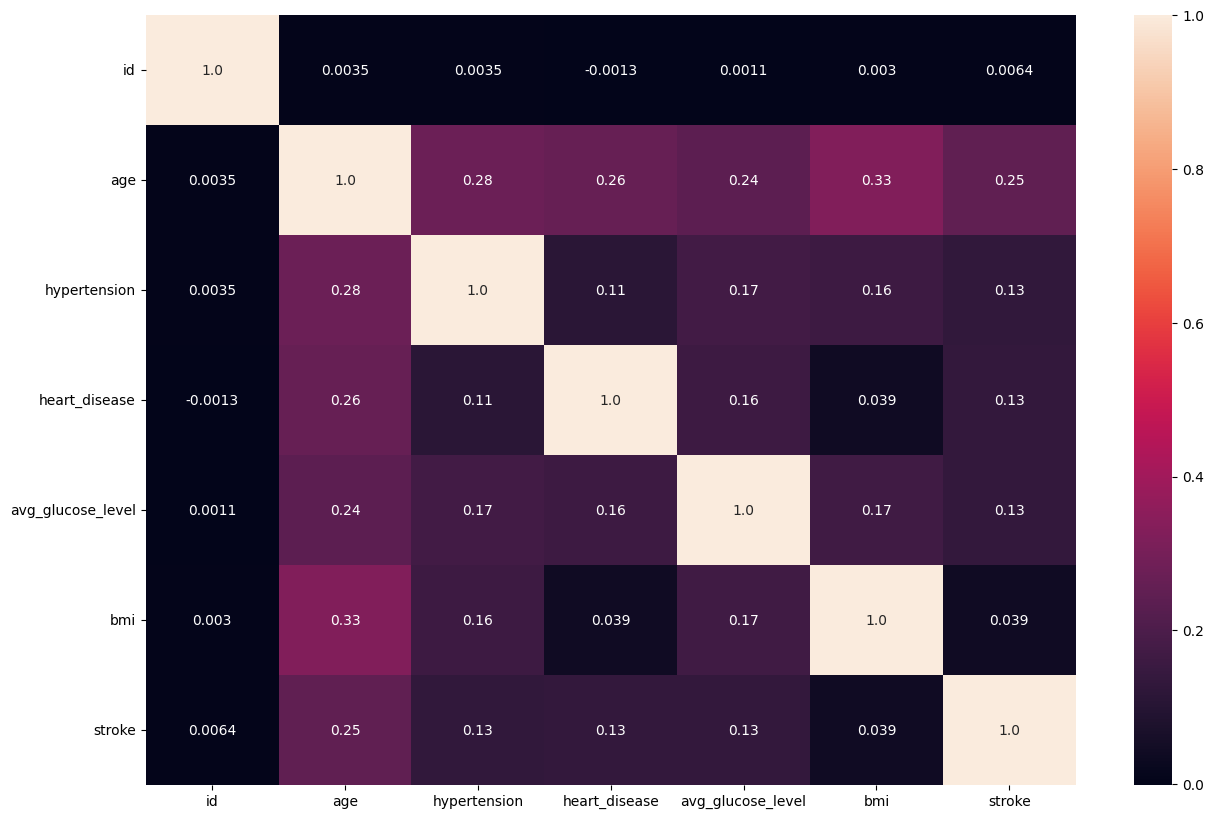

In [89]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2')

0    4861
1     249
Name: stroke, dtype: int64


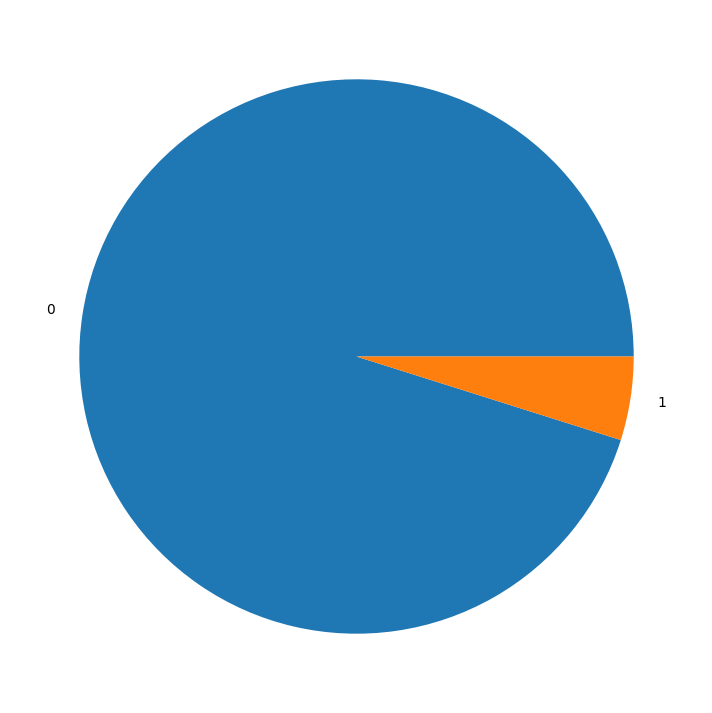

In [90]:
count=df['stroke'].value_counts()
label=['0','1']
plt.figure(figsize=(13,9))
plt.pie(count,labels=label)
print(count)

In [91]:
# drop the id as it is not correlated feature
df=df.drop(['id'],axis=1)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [92]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,253,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,212,2,1
3,0,70,0,0,1,2,1,3385,231,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


In [93]:
from sklearn.model_selection  import train_test_split
y = df.iloc[:,-1]
X = df.iloc[:,:-1]


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3577, 10) (1533, 10) (3577,) (1533,)


In [95]:
# Handling skewed data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())

0    3404
1    3404
Name: stroke, dtype: int64


In [96]:
#Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_resampled, y_resampled)
y_pred1=classifier.predict(X_test)

In [97]:
accuracy1 = accuracy_score(y_test, y_pred1)
confusion1 = confusion_matrix(y_test, y_pred1)
classification_rep1 = classification_report(y_test, y_pred1)

print("Accuracy:", accuracy1)
print("Confusion Matrix:\n", confusion1)
print("Classification Report:\n", classification_rep1)

Accuracy: 0.8721461187214612
Confusion Matrix:
 [[1317  140]
 [  56   20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1457
           1       0.12      0.26      0.17        76

    accuracy                           0.87      1533
   macro avg       0.54      0.58      0.55      1533
weighted avg       0.92      0.87      0.89      1533



In [98]:
# XGBoost
import xgboost as xgb
clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
clf.fit(X_resampled, y_resampled)
y_pred2 = clf.predict(X_test)

In [99]:
accuracy2 = accuracy_score(y_test, y_pred2)
confusion2 = confusion_matrix(y_test, y_pred2)
classification_rep2 = classification_report(y_test, y_pred2)

print("Accuracy:", accuracy2)
print("Confusion Matrix:\n", confusion2)
print("Classification Report:\n", classification_rep2)

Accuracy: 0.8969341161121983
Confusion Matrix:
 [[1353  104]
 [  54   22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1457
           1       0.17      0.29      0.22        76

    accuracy                           0.90      1533
   macro avg       0.57      0.61      0.58      1533
weighted avg       0.92      0.90      0.91      1533



In [100]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)
y_pred3 = clf.predict(X_test)

In [101]:
accuracy3 = accuracy_score(y_test, y_pred3)
confusion3 = confusion_matrix(y_test, y_pred3)
classification_rep3 = classification_report(y_test, y_pred3)

print("Accuracy:", accuracy3)
print("Confusion Matrix:\n", confusion3)
print("Classification Report:\n", classification_rep3)

Accuracy: 0.8969341161121983
Confusion Matrix:
 [[1353  104]
 [  54   22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1457
           1       0.17      0.29      0.22        76

    accuracy                           0.90      1533
   macro avg       0.57      0.61      0.58      1533
weighted avg       0.92      0.90      0.91      1533



In [102]:
# Support vector machine
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', C=2, gamma='scale')
svm_classifier.fit(X_resampled, y_resampled)
y_pred4 = svm_classifier.predict(X_test)

In [103]:
accuracy4 = accuracy_score(y_test, y_pred4)
confusion4 = confusion_matrix(y_test, y_pred4)
classification_rep4 = classification_report(y_test, y_pred4)

print("Accuracy:", accuracy4)
print("Confusion Matrix:\n", confusion4)
print("Classification Report:\n", classification_rep4)

Accuracy: 0.6744944553163731
Confusion Matrix:
 [[972 485]
 [ 14  62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.67      0.80      1457
           1       0.11      0.82      0.20        76

    accuracy                           0.67      1533
   macro avg       0.55      0.74      0.50      1533
weighted avg       0.94      0.67      0.77      1533

